In [5]:
# Import necessary libraries and data

import pandas as pd
import matplotlib.pyplot as plt
from src.model_utils import get_models
from src.learning_curve_utils import compute_learning_curve
from src.feature_utils import log_transform, ordinal_encode, scale_features

df = pd.read_csv("Stars.csv")

In [15]:
# Plot Stylization

plt.style.use("dark_background")

COLORS = {
    "pink": "#ff4ecd",
    "blue": "#4ea8ff",
    "green": "#3dff9f",
    "purple": "#b36bff"
}

In [7]:
# Apply features

df_fe = log_transform(
    df,
    columns=["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)"]
)

df_fe = ordinal_encode(df_fe)
df_fe.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3.486855,-2.619789,-0.769551,16.12,0,11,6
1,3.483159,-3.301029,-0.811916,16.60,0,11,6
2,3.414973,-3.522877,-0.991400,18.70,0,11,6
3,3.447158,-3.698968,-0.795880,16.65,0,11,6
4,3.287578,-3.860118,-0.987163,20.06,0,11,6


In [9]:
# Seperate Features from the Target

X = df_fe.drop("Star type", axis=1)
y = df_fe["Star type"]

X_scaled, scaler = scale_features(X)

In [11]:
# Generate learning curve

models = get_models()
model = models["logistic_regression"]

train_sizes, train_scores, val_scores = compute_learning_curve(
    model=model,
    X=X_scaled,
    y=y,
    cv_type="kfold",
    k=5
)

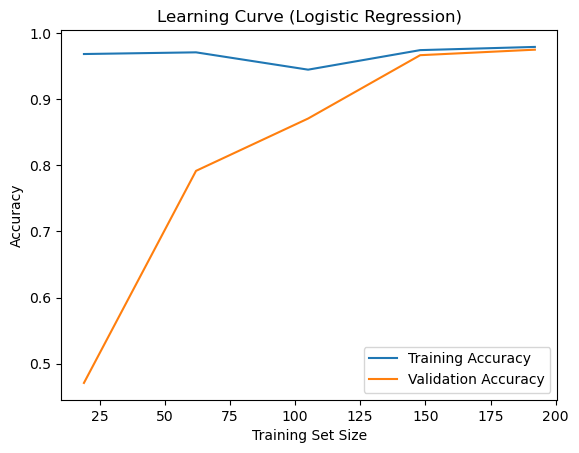

In [13]:
# Plot the learning curve

plt.plot(train_sizes, train_scores, label="Training Accuracy")
plt.plot(train_sizes, val_scores, label="Validation Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Logistic Regression)")
plt.legend()
plt.show()

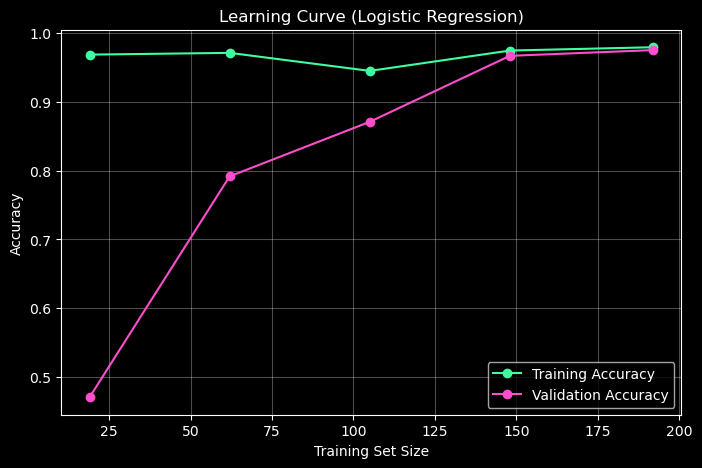

In [17]:
# Enhanced color plot

plt.figure(figsize=(8, 5))

plt.plot(
    train_sizes,
    train_scores,
    marker="o",
    color=COLORS["green"],
    label="Training Accuracy"
)

plt.plot(
    train_sizes,
    val_scores,
    marker="o",
    color=COLORS["pink"],
    label="Validation Accuracy"
)

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Logistic Regression)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()